In [ ]:
!pip install datasets
!pip install transformers[torch]
!pip install accelerate -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
#Import relevant libraries
import os

import pandas as pd
import numpy as np
import string
import datasets
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')

from transformers import AutoTokenizer
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import Trainer

from datasets import load_metric, load_dataset, Dataset
from sklearn.metrics import f1_score
from huggingface_hub import notebook_login

In [ ]:
og_dataset = pd.read_csv('/content/apple_iphone_11_reviews.csv')

print(og_dataset.head(10))

   index                         product                    helpful_count  \
0      0  Apple iPhone XR (64GB) - Black  5,087 people found this helpful   
1      1  Apple iPhone XR (64GB) - Black  2,822 people found this helpful   
2      2  Apple iPhone XR (64GB) - Black  1,798 people found this helpful   
3      3  Apple iPhone XR (64GB) - Black  1,366 people found this helpful   
4      4  Apple iPhone XR (64GB) - Black    536 people found this helpful   
5      5  Apple iPhone XR (64GB) - Black    313 people found this helpful   
6      6  Apple iPhone XR (64GB) - Black    189 people found this helpful   
7      7  Apple iPhone XR (64GB) - Black    164 people found this helpful   
8      8  Apple iPhone XR (64GB) - Black    124 people found this helpful   
9      9  Apple iPhone XR (64GB) - Black     94 people found this helpful   

   total_comments                                                url  \
0              24  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...   
1       

In [ ]:
data = og_dataset.drop(['total_comments', 'url', 'review_country', 'reviewed_at'
,'product_company', 'profile_name'], axis=1)

print(data.head(10))

   index                         product                    helpful_count  \
0      0  Apple iPhone XR (64GB) - Black  5,087 people found this helpful   
1      1  Apple iPhone XR (64GB) - Black  2,822 people found this helpful   
2      2  Apple iPhone XR (64GB) - Black  1,798 people found this helpful   
3      3  Apple iPhone XR (64GB) - Black  1,366 people found this helpful   
4      4  Apple iPhone XR (64GB) - Black    536 people found this helpful   
5      5  Apple iPhone XR (64GB) - Black    313 people found this helpful   
6      6  Apple iPhone XR (64GB) - Black    189 people found this helpful   
7      7  Apple iPhone XR (64GB) - Black    164 people found this helpful   
8      8  Apple iPhone XR (64GB) - Black    124 people found this helpful   
9      9  Apple iPhone XR (64GB) - Black     94 people found this helpful   

                                         review_text       review_rating  \
0                                              NOTE:  3.0 out of 5 stars   


In [ ]:
print(data.isnull().sum())
data.dropna(subset=['review_text'], inplace=True)
data.dropna(subset=['review_title'], inplace=True)
print()
print(data.isnull().sum())

index            0
product          0
helpful_count    0
review_text      3
review_rating    0
review_title     2
dtype: int64

index            0
product          0
helpful_count    0
review_text      0
review_rating    0
review_title     0
dtype: int64


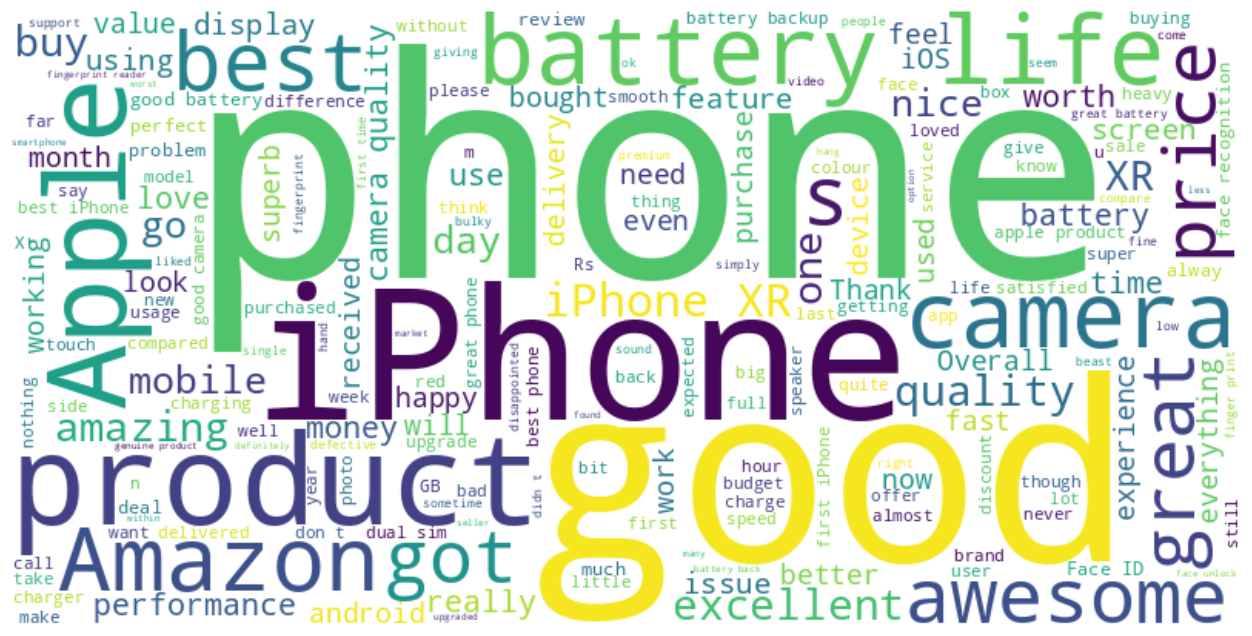

In [ ]:
text = ''.join(data['review_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, max_font_size=200, background_color="white").generate_from_text(text)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


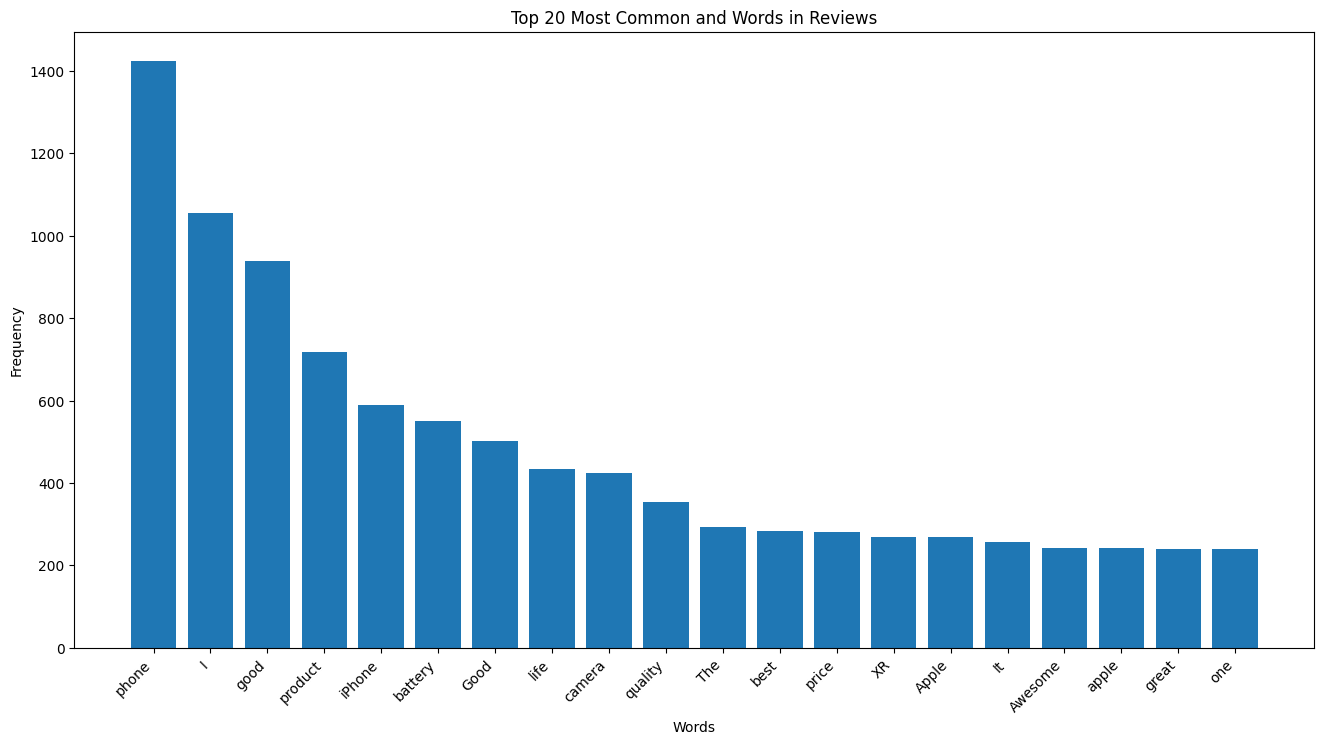

In [ ]:
plt.figure(figsize=(16, 8))
reviews = data['review_text']
# print(reviews)
all_words = []
for text in reviews:
  sentences = word_tokenize(str(text))
  words = [word for word in sentences if word not in string.punctuation]
  words = [word for word in words if word not in stopwords.words('english')]
  words = [word for word in words if word.isalpha()]
  all_words.extend(words)

word_freq = collections.Counter(all_words)
common_words = word_freq.most_common(20)
words, frequencies = zip(*common_words)

plt.bar(words, frequencies)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common and Words in Reviews')
plt.show()



In [ ]:
def label_rating(review_rating):
  match = re.search(r'(\d+(\.\d+))\s*out of 5 stars', review_rating)
  if match:
    return float(match.group(1))
  else:
    return None

data['numeric_rating'] = data['review_rating'].apply(label_rating)
print(data['numeric_rating'])


none_values = data['numeric_rating'].isna()
none_count = none_values.sum()
print("None values: ", none_count)

0       3.0
1       1.0
2       5.0
3       1.0
4       5.0
       ... 
5005    4.0
5006    4.0
5007    5.0
5008    5.0
5009    5.0
Name: numeric_rating, Length: 5007, dtype: float64
None values:  0


In [ ]:
def apply_labels(numeric_rating):
  if numeric_rating < 3:
    label = 'bad'
  elif numeric_rating == 3:
    label = 'neutral'
  else:
    label = 'good'
  return label

data['label'] = data['numeric_rating'].apply(apply_labels)
print(data['label'])

0       neutral
1           bad
2          good
3           bad
4          good
         ...   
5005       good
5006       good
5007       good
5008       good
5009       good
Name: label, Length: 5007, dtype: object


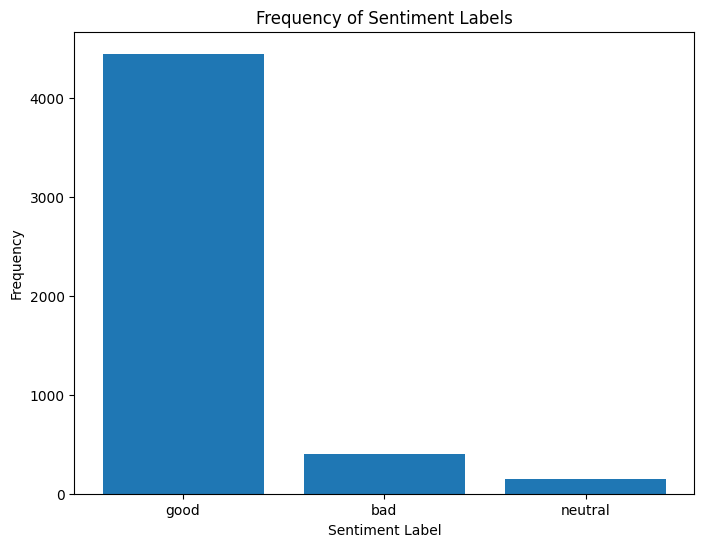

In [ ]:
label_counts = data['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Frequency of Sentiment Labels')
plt.show()

In [ ]:

neutral = data[data['label'] == 'neutral']
bad = data[data['label'] == 'bad']

good = data[data['label'] == 'good']

neutral_upsampled = neutral.sample(n=len(good), replace=True, random_state = 20)


bad_upsampled = bad.sample(n=len(good), replace=True, random_state = 20)

up_data = pd.concat([neutral_upsampled, bad_upsampled, good])




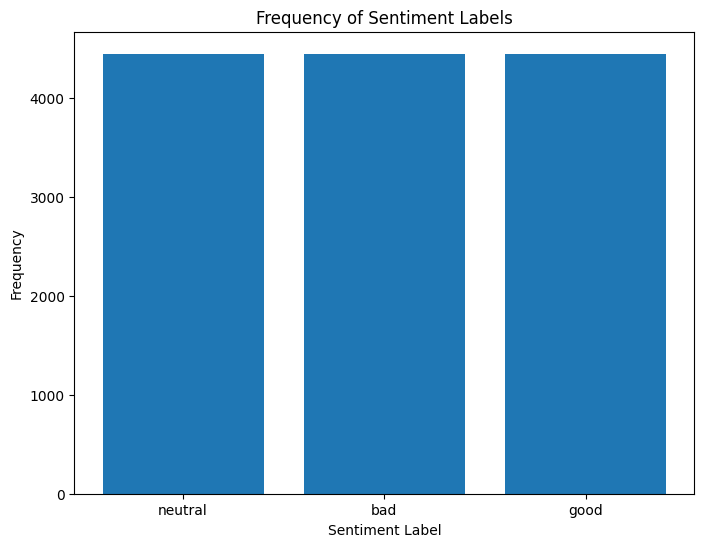

In [ ]:
label_counts = up_data['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Frequency of Sentiment Labels')
plt.show()

In [ ]:
train, eval = train_test_split(up_data,train_size=0.8,stratify=up_data['label'])

print(train)
print(eval)

      index                         product                  helpful_count  \
2033   2033  Apple iPhone XR (64GB) - Black                              0   
4199   4199  Apple iPhone XR (64GB) - Black                              0   
920     920  Apple iPhone XR (64GB) - Black                              0   
2587   2587  Apple iPhone XR (64GB) - Black                              0   
504     504  Apple iPhone XR (64GB) - Black  One person found this helpful   
...     ...                             ...                            ...   
4978   4978  Apple iPhone XR (64GB) - Black                              0   
1357   1357  Apple iPhone XR (64GB) - Black  One person found this helpful   
390     390  Apple iPhone XR (64GB) - Black    2 people found this helpful   
247     247  Apple iPhone XR (64GB) - Black                              0   
497     497  Apple iPhone XR (64GB) - Black  One person found this helpful   

                                            review_text       r

In [ ]:
tokenizer=AutoTokenizer.from_pretrained('distilbert-base-cased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
train['review_text'] = train['review_text'].astype(str)
eval['review_text'] = eval['review_text'].astype(str)

label_mapping = {'bad': 0, 'neutral': 1, 'good': 2}

train['label'] = train['label'].map(label_mapping)
eval['label'] = eval['label'].map(label_mapping)

train_dataset = Dataset.from_pandas(train[['review_text', 'label']])
eval_dataset = Dataset.from_pandas(eval[['review_text', 'label']])

def tokenize_data(batch):
  tokenized_batch = tokenizer(batch['review_text'], padding='max_length', truncation=True, max_length=512)
  tokenized_batch['labels'] = batch['label']
  return tokenized_batch

train_dataset = train_dataset.map(tokenize_data, batched=True)
eval_dataset = eval_dataset.map(tokenize_data, batched=True)

print(train['label'].head())
print(eval['label'].head())
print(train_dataset[0])


Map:   0%|          | 0/10675 [00:00<?, ? examples/s]

Map:   0%|          | 0/2669 [00:00<?, ? examples/s]

2033    0
4199    1
920     2
2587    2
504     0
Name: label, dtype: int64
1845    0
3282    0
555     0
134     2
119     0
Name: label, dtype: int64
{'review_text': 'My phone is not working properly & I m not satisfy, its cheating done by seller & Amazon is not supporting', 'label': 0, '__index_level_0__': 2033, 'input_ids': [101, 1422, 2179, 1110, 1136, 1684, 7513, 111, 146, 182, 1136, 13692, 117, 1157, 18661, 1694, 1118, 18275, 111, 9786, 1110, 1136, 4374, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

In [ ]:
trainargs=TrainingArguments('tweet_sentiments_analysis_distilbert',
  num_train_epochs=5,
  evaluation_strategy="epoch",
  save_strategy='epoch',
  load_best_model_at_end=True,
  push_to_hub=False
)

In [ ]:
model_name = 'distilbert-base-cased'
num_labels = 3
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

trainer = Trainer(
  model=model,
  args=trainargs,
  train_dataset=train_dataset,
  eval_dataset=eval_dataset,
  tokenizer=tokenizer,
  compute_metrics=compute_metrics,
)

trainer.train()

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1-score
1,0.249200,0.122665,0.966614
2,0.091200,0.109506,0.973028
3,0.059100,0.115392,0.973364
4,0.038100,0.093448,0.975194
5,0.040800,0.091827,0.975189


TrainOutput(global_step=6675, training_loss=0.12260814502444607, metrics={'train_runtime': 2688.8565, 'train_samples_per_second': 19.85, 'train_steps_per_second': 2.482, 'total_flos': 7070573494656000.0, 'train_loss': 0.12260814502444607, 'epoch': 5.0})

In [ ]:
results = trainer.evaluate()
print("DistilBERT model:")
print("Evaluation results:", results)

DistilBERT model:
Evaluation results: {'eval_loss': 0.09182687848806381, 'eval_f1-score': 0.9751889560307472, 'eval_runtime': 42.362, 'eval_samples_per_second': 63.005, 'eval_steps_per_second': 7.884, 'epoch': 5.0}
